In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
np.set_printoptions(linewidth=1000) #numpy print options

Cr.https://www.youtube.com/watch?v=llZFHmni9QA&list=PLoTScYm9O0GH_3VrwwnQafwWQ6ibKnEtU&index=38
   
I reivew PCA

In [4]:
data_file='https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip'
print(f'data_file: {data_file}')
df=pd.read_csv(data_file)
df.head()

data_file: https://github.com/prasertcbs/basic-dataset/raw/master/mnist_28x28_5000rows.csv.zip


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


# EDA datasets

In [17]:
X = df.drop(columns=['class']).to_numpy()
# df.iloc[:,:784]
y = df.iloc[:,-1]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
X[0].reshape(28,-1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  59, 229, 254, 255, 255, 254, 229, 105,  18,   0

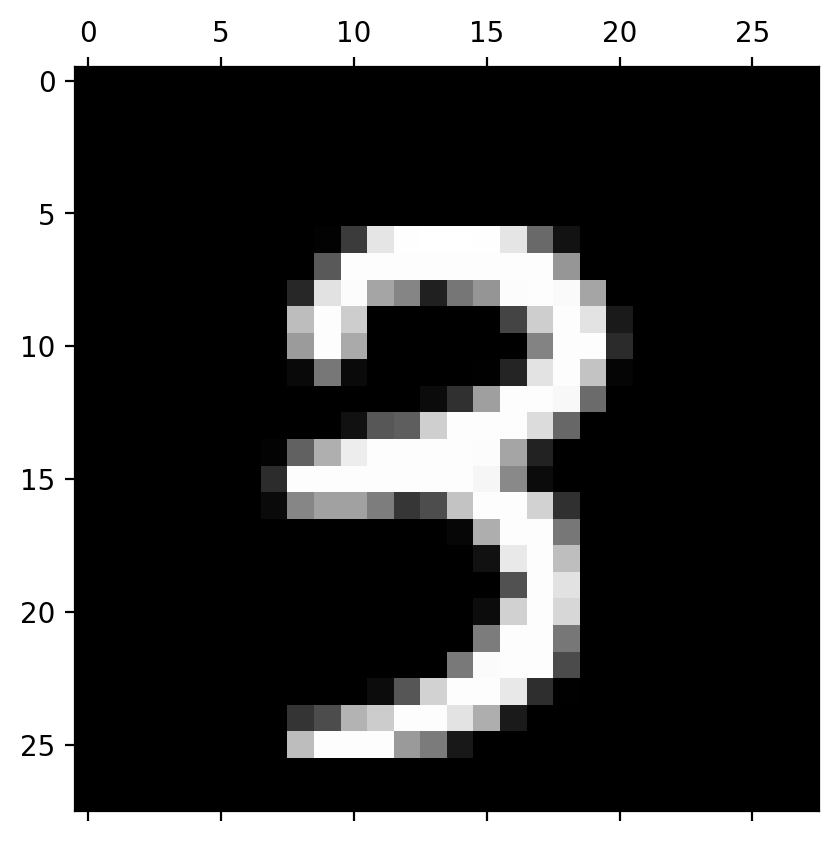

In [15]:
plt.matshow(X[0].reshape(28,-1) , cmap='gray')

<Axes: >

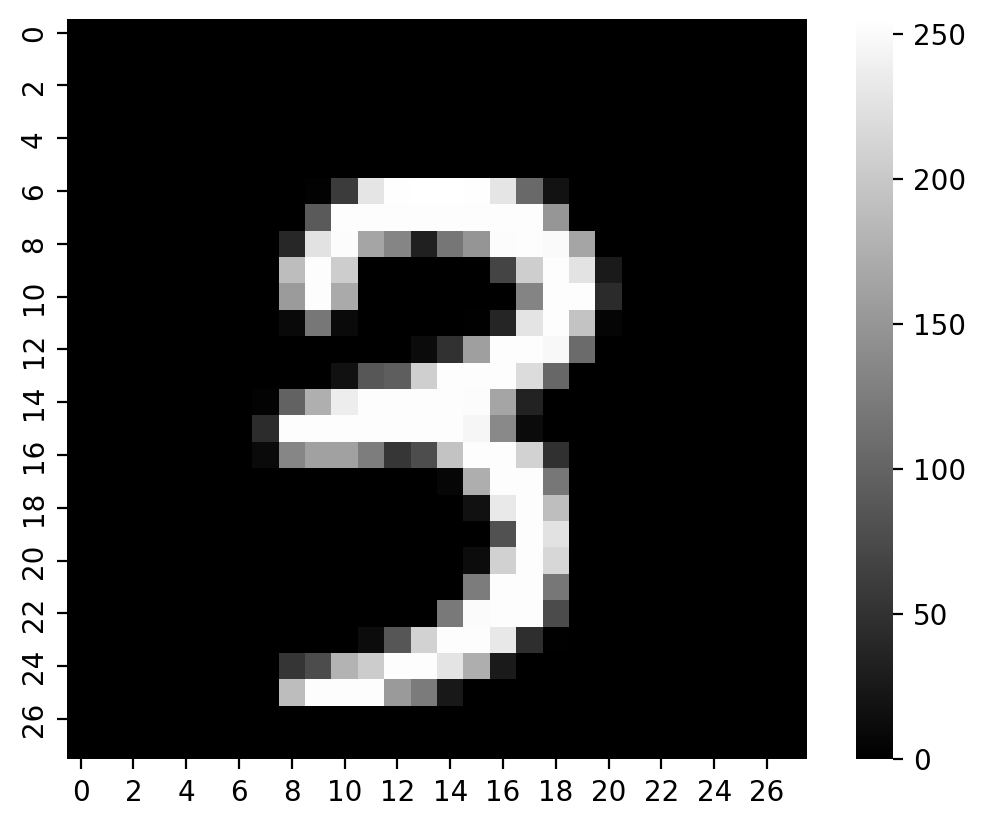

In [20]:
sns.heatmap(X[0].reshape(28, -1), cmap='gray', square=True)

# Prepare data

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, stratify=y)

In [26]:
scaler = StandardScaler() # Fit on training set only.
scaler.fit(X_train) # Apply transform to both the training set and the test set.
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

# Not PCA

In [33]:
model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=1000)
# model = RandomForestClassifier(max_depth=10)
model.fit(X_train_z, y_train)

LogisticRegression(max_iter=1000)

In [34]:
model.score(X_train_z, y_train)

1.0

In [35]:
model.score(X_test_z, y_test)

0.893

In [41]:
predicted = model.predict(X_test_z)
cm=metrics.confusion_matrix(y_test, predicted)
cm

array([[ 86,   0,   0,   1,   0,   2,   2,   0,   1,   0],
       [  0, 118,   1,   0,   0,   0,   1,   0,   0,   1],
       [  2,   1,  92,   2,   1,   0,   1,   4,   0,   1],
       [  0,   1,   1,  93,   0,   7,   1,   0,   1,   0],
       [  3,   1,   0,   0,  84,   0,   2,   1,   0,   1],
       [  1,   1,   2,   3,   2,  78,   1,   0,   2,   2],
       [  3,   0,   4,   1,   2,   2,  84,   0,   1,   0],
       [  0,   0,   4,   5,   2,   0,   0,  94,   1,   0],
       [  0,   2,   4,   3,   1,   5,   0,   0,  70,   1],
       [  0,   0,   0,   2,   6,   0,   0,   4,   0,  94]])

In [40]:
pd.crosstab(y_test, predicted, margins='All')

col_0,0,1,2,3,4,5,6,7,8,9,All
class,,,,,,,,,,,
0,86,0,0,1,0,2,2,0,1,0,92
1,0,118,1,0,0,0,1,0,0,1,121
2,2,1,92,2,1,0,1,4,0,1,104
3,0,1,1,93,0,7,1,0,1,0,104
4,3,1,0,0,84,0,2,1,0,1,92
5,1,1,2,3,2,78,1,0,2,2,92
6,3,0,4,1,2,2,84,0,1,0,97
7,0,0,4,5,2,0,0,94,1,0,106
8,0,2,4,3,1,5,0,0,70,1,86


In [42]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        92
           1       0.95      0.98      0.96       121
           2       0.85      0.88      0.87       104
           3       0.85      0.89      0.87       104
           4       0.86      0.91      0.88        92
           5       0.83      0.85      0.84        92
           6       0.91      0.87      0.89        97
           7       0.91      0.89      0.90       106
           8       0.92      0.81      0.86        86
           9       0.94      0.89      0.91       106

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



# PCA

In [49]:
pca=PCA(n_components=X_train.shape[1])
X_new = pca.fit_transform(X) # Fit the model with X and apply the dimensionality reduction on X.
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_.round(4)}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance_ratio (n_components=784) = [0.0977 0.072  0.0617 0.0543 0.0476 0.0423 0.0328 0.0291 0.028  0.0234 0.0213 0.0201 0.0173 0.0168 0.0158 0.0149 0.0133 0.0129 0.0122 0.0116 0.0107 0.0103 0.0096 0.0093 0.0089 0.0086 0.0081 0.0078 0.0075 0.007  0.0067 0.0065 0.0061 0.0057 0.0056 0.0052 0.0051 0.005  0.0049 0.0047 0.0045 0.0043 0.0042 0.0041 0.0039 0.0038 0.0036 0.0034 0.0034 0.0033 0.0032 0.0031 0.003  0.003  0.0028 0.0027 0.0027 0.0026 0.0026 0.0025 0.0024 0.0023 0.0023 0.0022 0.0021 0.0021 0.002  0.0019 0.0019 0.0019 0.0019 0.0018 0.0018 0.0017 0.0017 0.0016 0.0016 0.0016 0.0015 0.0015 0.0014 0.0014 0.0014 0.0014 0.0014 0.0013 0.0013 0.0013 0.0013 0.0012 0.0012 0.0012 0.0011 0.0011 0.0011 0.0011 0.001  0.001  0.001  0.001  0.001  0.001  0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0007 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0.0006 0

In [52]:
pca.explained_variance_.round(5) # Eigenvalues

array([3.32246871e+05, 2.44998191e+05, 2.10036478e+05, 1.84662077e+05, 1.61857555e+05, 1.43899112e+05, 1.11439095e+05, 9.90995976e+04, 9.53339395e+04, 7.95626800e+04, 7.23006650e+04, 6.85517600e+04, 5.88202393e+04, 5.72655054e+04, 5.36500566e+04, 5.08293227e+04, 4.53526599e+04, 4.40215479e+04, 4.14127355e+04, 3.93212679e+04, 3.62978828e+04, 3.49350288e+04, 3.27570598e+04, 3.15661890e+04, 3.02712051e+04, 2.91966873e+04, 2.75587369e+04, 2.66545063e+04, 2.53770013e+04, 2.39594884e+04, 2.27940686e+04, 2.20375268e+04, 2.06782775e+04, 1.95439458e+04, 1.91416440e+04, 1.77687834e+04, 1.74037468e+04, 1.69975115e+04, 1.65761219e+04, 1.59395166e+04, 1.52188502e+04, 1.47210465e+04, 1.42236198e+04, 1.40413762e+04, 1.32812312e+04, 1.28066602e+04, 1.22985038e+04, 1.16439763e+04, 1.14603460e+04, 1.11794025e+04, 1.08078251e+04, 1.06969495e+04, 1.01230135e+04, 1.01043741e+04, 9.43527911e+03, 9.31211933e+03, 9.17286520e+03, 8.84006885e+03, 8.79995082e+03, 8.54740202e+03, 8.20269280e+03, 7.79711553e+03,
 

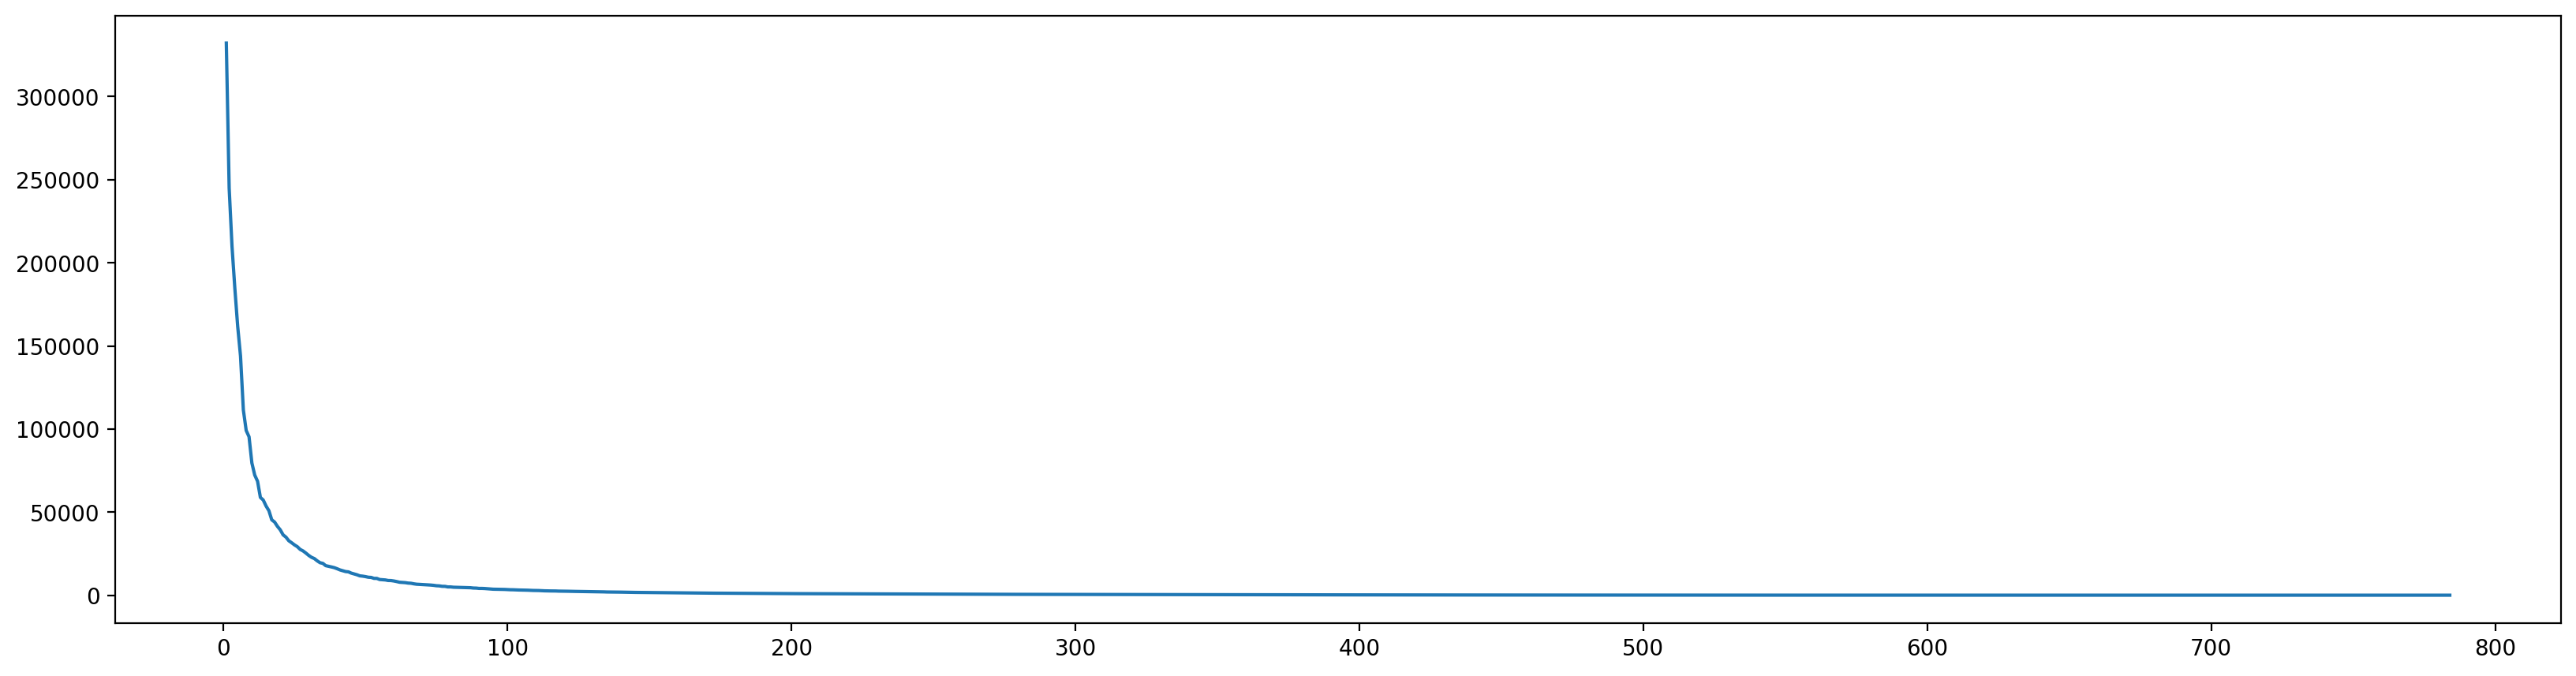

In [46]:
plt.figure(figsize=(20, 5))
# plt.plot(range(1, pca.n_components_+1), pca.explained_variance_, '--o')
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_, linestyle='-')

In [53]:
# cvar = cumulative proportion of var explained
cvar=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
cvar #cumulative sum of variance explained with [n] features

array([ 9.8, 17. , 23.2, 28.6, 33.4, 37.6, 40.9, 43.8, 46.6, 48.9, 51. , 53. , 54.7, 56.4, 58. , 59.5, 60.8, 62.1, 63.3, 64.5, 65.6, 66.6, 67.6, 68.5, 69.4, 70.3, 71.1, 71.9, 72.6, 73.3, 74. , 74.6, 75.2, 75.8, 76.4, 76.9, 77.4, 77.9, 78.4, 78.9, 79.3, 79.7, 80.1, 80.5, 80.9, 81.3, 81.7, 82. , 82.3, 82.6, 82.9, 83.2, 83.5, 83.8, 84.1, 84.4, 84.7, 85. , 85.3, 85.6, 85.8, 86. , 86.2, 86.4, 86.6, 86.8, 87. , 87.2, 87.4, 87.6, 87.8, 88. , 88.2, 88.4, 88.6, 88.8, 89. , 89.2, 89.3, 89.4, 89.5, 89.6, 89.7, 89.8, 89.9, 90. , 90.1, 90.2, 90.3, 90.4, 90.5, 90.6, 90.7, 90.8, 90.9, 91. , 91.1, 91.2, 91.3, 91.4, 91.5, 91.6, 91.7, 91.8, 91.9, 92. , 92.1, 92.2, 92.3, 92.4, 92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5, 93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7, 95.7,
   

Text(0.5, 0, 'components')

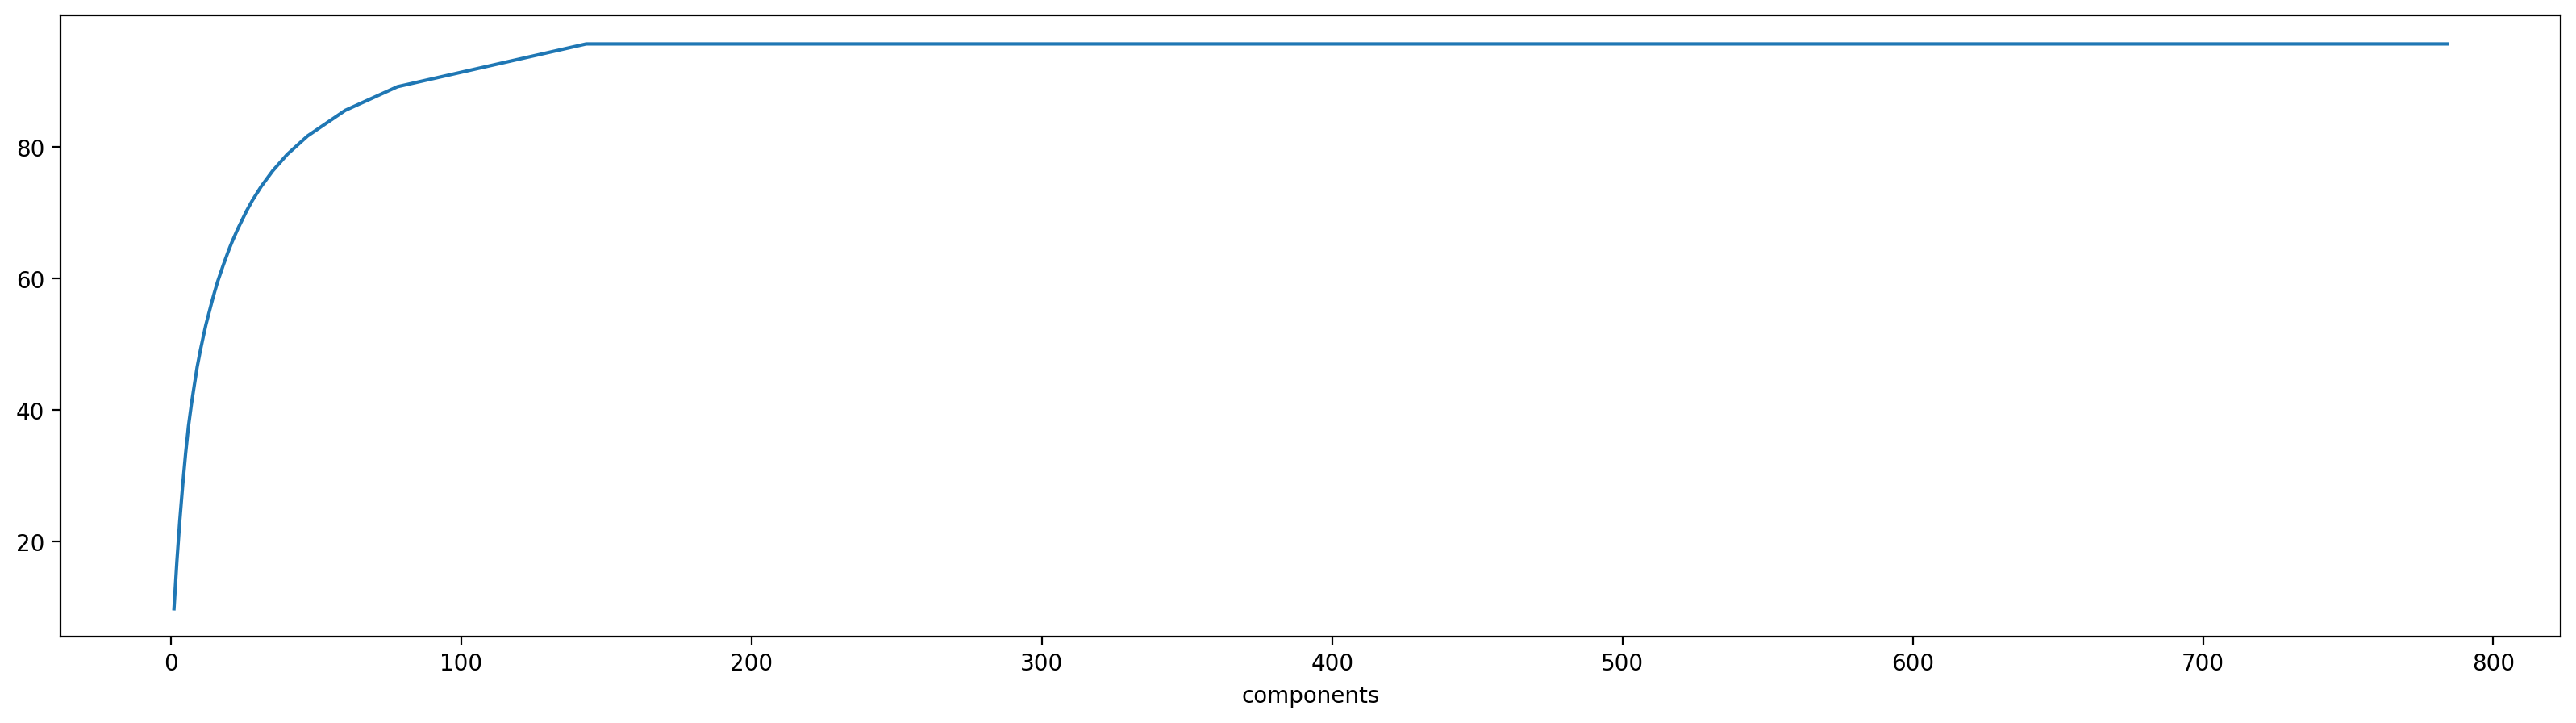

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(range(1, pca.n_components_+1), cvar, linestyle='-');
plt.xlabel('components')

Choose

In [55]:
# select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
pca = PCA(.90) # Cumulative >= 90
# pca = PCA(n_components=85)
pca.fit(X_train)

PCA(n_components=0.9)

In [56]:
pca.n_components_

85

Using

In [57]:
X_train_z_PCA = pca.transform(X_train)
X_test_z_PCA = pca.transform(X_test)

In [58]:
X_train_z_PCA.shape

(4000, 85)

OVERVIEW

In [60]:
X = df[df.columns[df.columns.str.startswith('pixel')]]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [61]:
for n in [.8, .85, .9, .95]:
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform to both the training set and the test set.
    X_train_t = scaler.transform(X_train)
    X_test_t = scaler.transform(X_test)
    pca = PCA(n)
    pca.fit(X_train_t)
    X_train_pca = pca.transform(X_train_t)
    X_test_pca = pca.transform(X_test_t)
    model = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=1000)

    model.fit(X_train_pca, y_train)
    print(f'pca = {n:.2f}({pca.n_components_:3} components), accuracy (train) = {model.score(X_train_pca, y_train):.4f}, accuracy (test) = {model.score(X_test_pca, y_test):.4f}')

pca = 0.80(107 components), accuracy (train) = 0.9593, accuracy (test) = 0.8860
pca = 0.85(135 components), accuracy (train) = 0.9700, accuracy (test) = 0.8840
pca = 0.90(176 components), accuracy (train) = 0.9850, accuracy (test) = 0.8750
pca = 0.95(253 components), accuracy (train) = 0.9972, accuracy (test) = 0.8770


In [62]:
def plot_varying_components(dfX, n_img=10, n_components=[10, 20, 30, 50, 100, 200, 300], img_shape=(28, 28)):
    '''
    show the images differen n_components
    '''
    img_height = img_shape[0]
    img_width = img_shape[1]

    X_train=dfX
    scaler = StandardScaler() # Fit on training set only.
    scaler.fit(X_train) # Apply transform

    XT=X_train.to_numpy() # original X_train

    fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
    [ax[i].matshow(XT[i].reshape(img_height, img_width)) for i in range(n_img)];

    for n_component in n_components:
        X_train_t = scaler.transform(X_train)
        # If 0 < n_components < 1 and svd_solver == 'full',
        # select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
        pca = PCA(n_components=n_component)
        X_train_pca = pca.fit_transform(X_train_t)  # Apply dimensionality reduction to X_train_t
        print(f'n_component = {n_component}, {X_train_pca.shape}')
        XP=np.dot(X_train_pca, pca.components_) # matrix A x B
        fig, ax = plt.subplots(1, n_img, figsize=(20, 4))
        [ax[i].matshow(XP[i].reshape(img_height, img_width)) for i in range(n_img)]


n_component = 10, (4000, 10)
n_component = 50, (4000, 50)
n_component = 100, (4000, 100)
n_component = 300, (4000, 300)


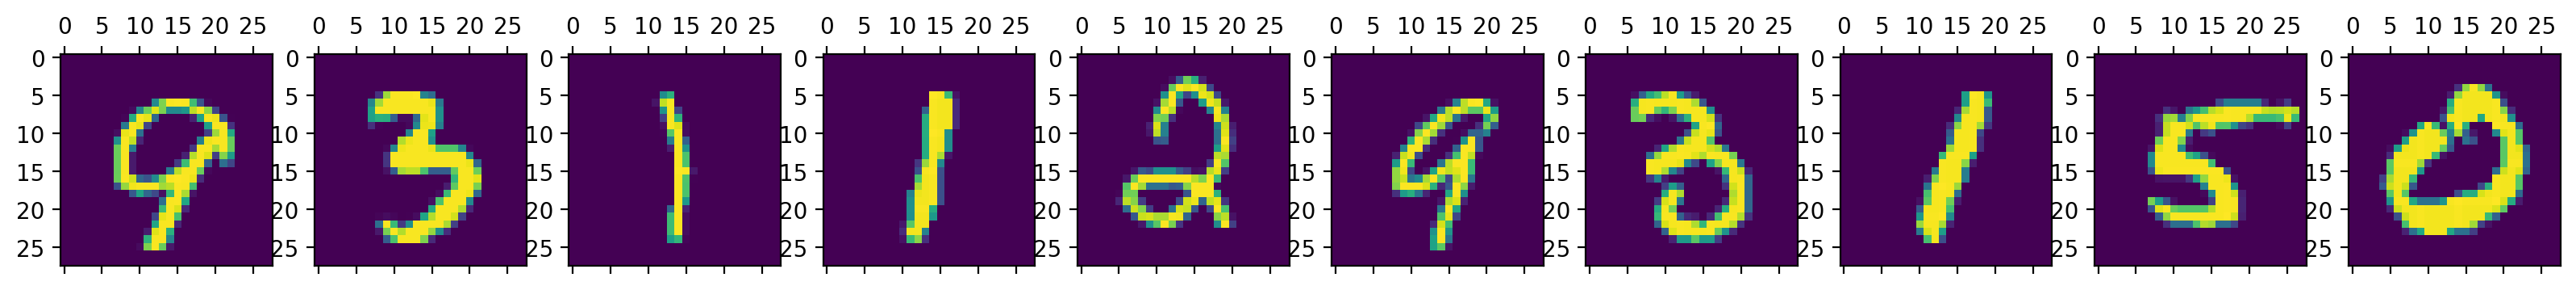

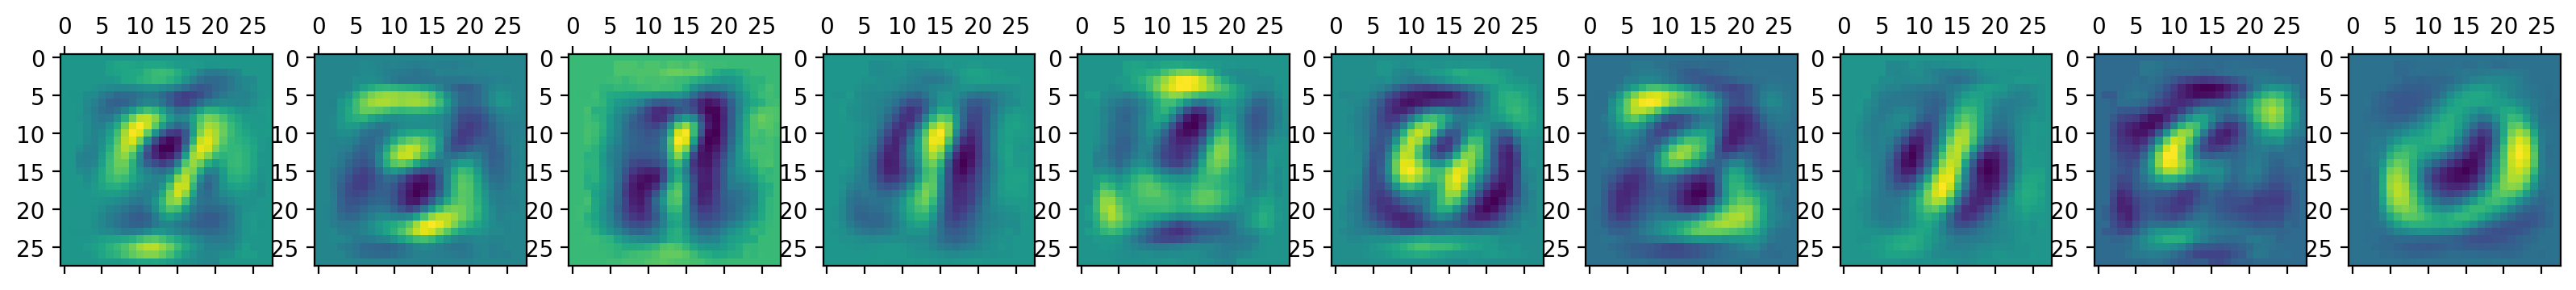

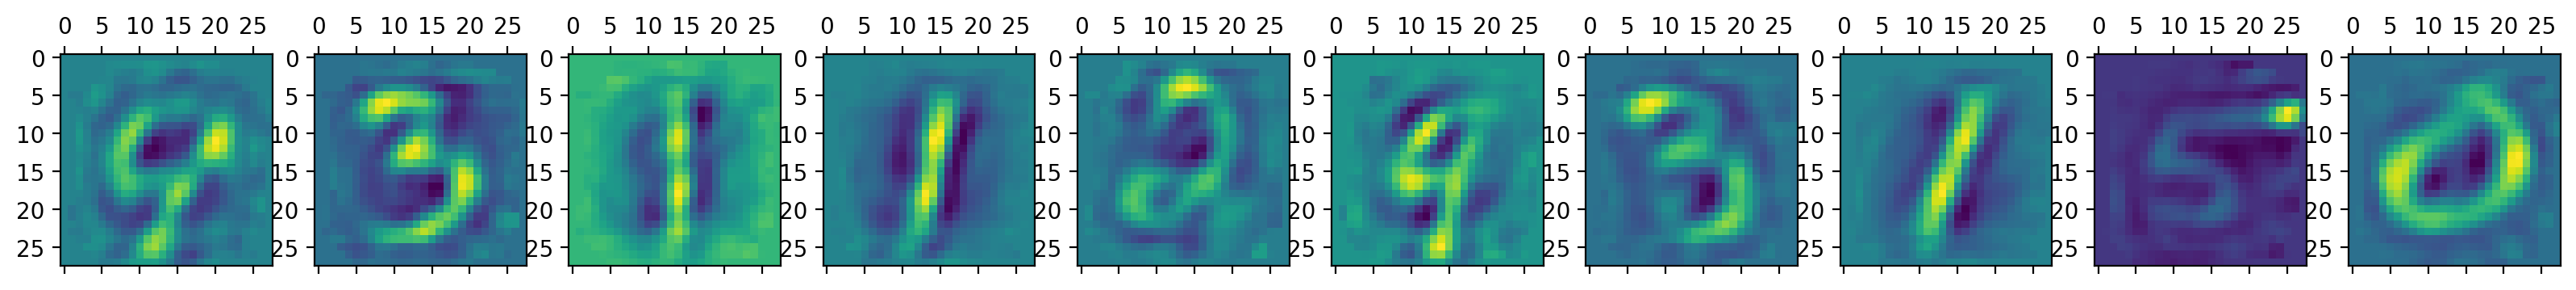

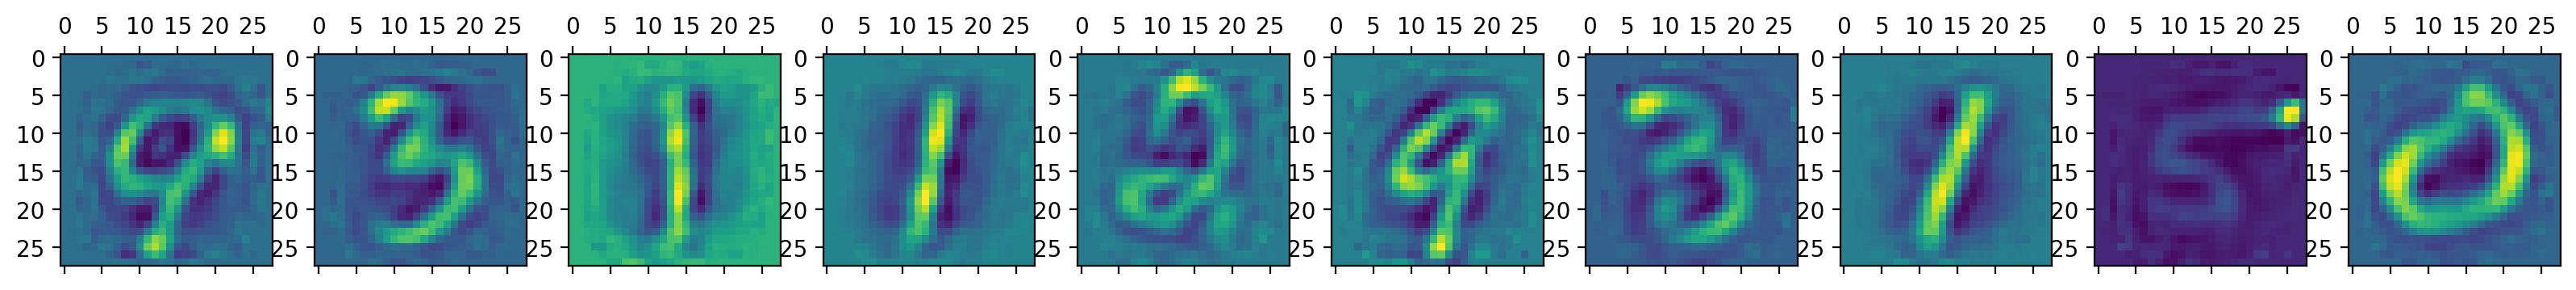

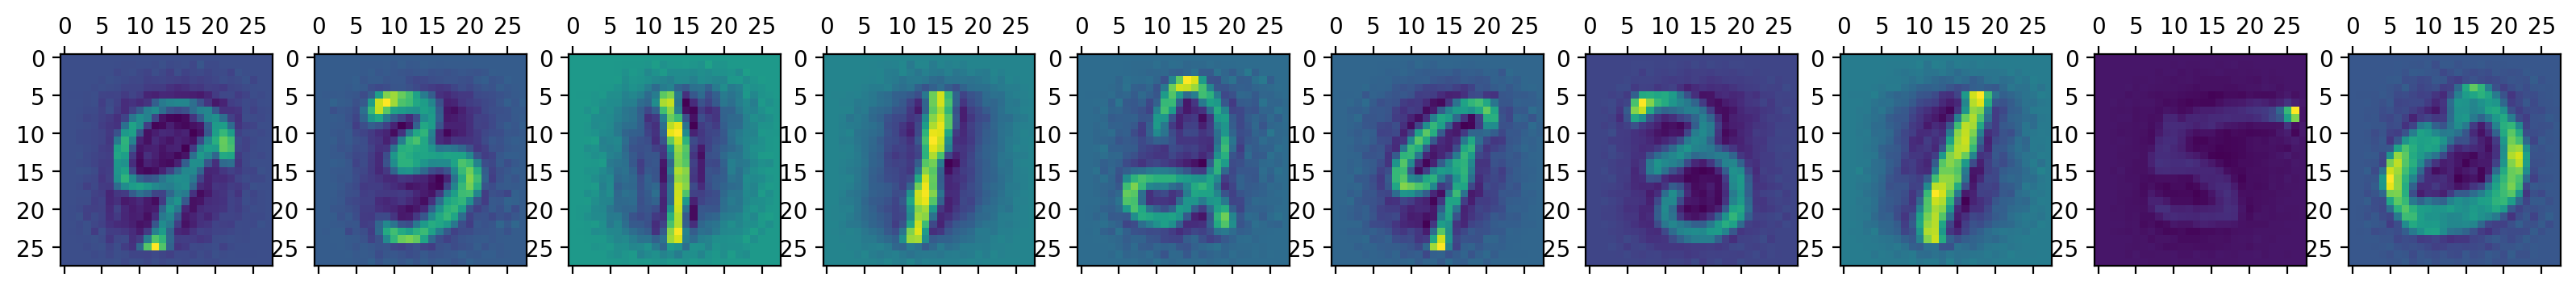

In [63]:
plot_varying_components(X_train, 10, [10, 50, 100, 300], (28, 28))
# plot_varying_compoents(X_train, [10, 50, 100, 200, 300])